In [96]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from torch.autograd import Variable
import torchvision.transforms as transforms
import cv2
from matplotlib import pyplot as plt

import os

from sklearn import neighbors, datasets


In [97]:
model_vgg16 = models.vgg16(pretrained=True).to('cuda')

In [98]:
model_vgg16.classifier = model_vgg16.classifier[0:len(model_vgg16.classifier)-1]
model_vgg16.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [99]:
preprocess_vgg = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(224),
    transforms.ToTensor()
])

D:\anaconda\envs\snowflakes\lib\site-packages\torchvision\transforms\transforms.py:317: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [100]:
label = [i for i in os.listdir(path='./train/')]
data = []
labels = []
for name in label:
    for file in os.listdir(path=f'./train/{name}/'):
        data.append(file)
        labels.append(name)
print(len(data), len(labels))

16 16


In [101]:
features_vgg=[]
i = 0
for img in data:
    torch.cuda.empty_cache()
    img_pil = Image.open(f'./train/{labels[i]}/' + img)
    img_tensor_vgg = preprocess_vgg(img_pil)
    img_tensor_vgg.unsqueeze_(0)
    img_var_vgg = Variable(img_tensor_vgg.to('cuda'))
    ## Trich Xuat Dat Trung ##
    out_vgg = model_vgg16(img_var_vgg)
    newOut_vgg = np.squeeze(out_vgg.data.to('cpu'))
    features_vgg.append(newOut_vgg)
    i+=1
print(len(features_vgg))

16


In [102]:
#test = np.random.choice(data)
#img_ = Image.open(f'./train/{labels[data.index(test)]}/{test}')
img_ = Image.open('test.jpg')
img_tensor_vgg = preprocess_vgg(img_)
img_tensor_vgg.unsqueeze_(0)
img_var_vgg = Variable(img_tensor_vgg.to('cuda'))
## Trich Xuat Dat Trung ##
out_vgg = model_vgg16(img_var_vgg)
newOut_vgg = np.squeeze(out_vgg.data.to('cpu'))
test_vgg = np.array(newOut_vgg, dtype=float)

In [104]:
train_vgg = [np.array(i,dtype=float) for i in features_vgg]
train_vgg

[array([0.26944661, 0.        , 0.        , ..., 0.        , 0.95785028,
        0.        ]),
 array([0.        , 0.        , 0.        , ..., 0.        , 1.86479723,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.75127953]),
 array([0.        , 0.        , 0.        , ..., 0.1284786 , 0.        ,
        1.52531636]),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.66604757]),
 array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.24833477]),
 array([0.        , 0.        , 0.17625119, ..., 0.        , 0.        ,
        0.81534058]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.        , 0.        , 0.11197555, ..., 0.        , 0.        ,
        0.        ]),
 array

In [105]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(train_vgg, labels)
NearestNeighbors(n_neighbors=3)
distance, results = neigh.kneighbors([test_vgg], n_neighbors=3)
print(results)


[[5 6 4]]


In [106]:
def showImage(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

Test Image


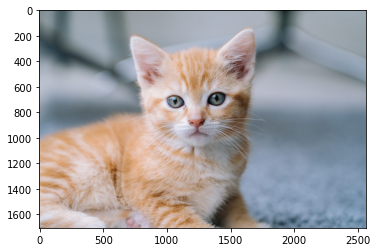

Top 3 Pics


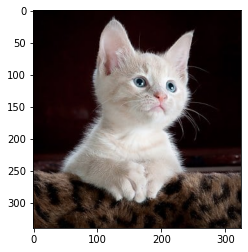

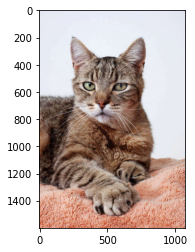

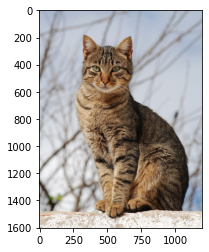

In [107]:
print("Test Image")
#showImage(cv2.imread(f"./train/{labels[data.index(test)]}/{test}"))
showImage(cv2.imread(f"test.jpg"))
#print(labels[data.index(test)])
print("Top 3 Pics")
for i in results[0]:
    showImage(cv2.imread(f'./train/{labels[i]}/{data[i]}'))
